# Errori di segno e errori di grandezza {#sec-errors-s-m}

**Prerequisiti**

- Rileggi [Horoscopes](../../figures/horoscopes.pdf). Alla luce degli approfondimenti forniti in questo corso, questo capitolo di @McElreath_rethinking dovrebbe assumere un significato diverso rispetto a quando è stato letto all'inizio del corso.


**Concetti e competenze chiave**

- Relazione tra crisi della replicabilità e approccio frequentista.
- Limiti della significatività statistica.
- Errori di grandezza e errori di segno.
- Utilizzo dell'approccio bayesiano per ottenere stime più precise e affidabili.

**Preparazione del Notebook**

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
seed: int = sum(map(ord, "s_m_errors"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo verrà esaminata la relazione tra la crisi della replicabilità e la procedura di decisione statistica dell'approccio frequentista. In particolare, verranno discussi gli errori di tipo *M* (*magnitude*) e di tipo *S* (*sign*) che sono stati discussi da @loken2017measurement.

## Il Filtro della Significatività Statistica

Nel @sec-crisis abbiamo esaminato come la pratica scientifica contemporanea sia spesso compromessa da casi di frode, principalmente a causa delle notevoli implicazioni economiche legate alla pubblicazione su riviste scientifiche prestigiose. Questo problema è frequentemente sottovalutato, poiché le riviste sono riluttanti ad ammettere la necessità di correzioni o ritrattazioni degli articoli già pubblicati.

La frode scientifica rappresenta una minaccia evidente alla riproducibilità dei risultati, pilastro fondamentale del metodo scientifico. Tuttavia, le difficoltà nel replicare i risultati pubblicati non sono attribuibili esclusivamente alla frode o a "pratiche di ricerca disoneste" [@nelson2018psychology]. Un problema intrinseco riguarda il metodo statistico ampiamente adottato dai ricercatori: l'approccio del test di ipotesi nulla e della significatività statistica di stampo fisheriano. Secondo questo metodo, i risultati che non raggiungono la "significatività statistica" dovrebbero essere scartati, mentre quelli che la superano possono essere considerati credibili, basandosi unicamente su questo criterio [@wagenmakers2008bayesian].

Tuttavia, l'idea che la significatività statistica sia un filtro affidabile per distinguere i risultati di ricerca "validi" da quelli "non validi" è fondamentalmente errata. Numerose evidenze dimostrano la fallacia di questo approccio. Per approfondire questo aspetto, esamineremo lo studio di @loken2017measurement, che mette in luce la relazione tra la crisi della replicabilità e la procedura di decisione statistica dell'approccio frequentista.

Uno dei principali problemi evidenziati dallo studio di @loken2017measurement è che, in contesti di ricerca complessi, la significatività statistica fornisce prove molto deboli riguardo al segno o all'entità di eventuali effetti sottostanti. In altre parole, il raggiungimento della significatività statistica non garantisce né la rilevanza né la consistenza dei risultati ottenuti.

## Errori di tipo *M* e *S* 

Per evidenziare le implicazioni del processo decisionale basato sulla significatività statistica, gli autori di @loken2017measurement hanno condotto una simulazione. In questa simulazione, hanno immaginato una ricerca ipotetica in cui un effetto reale, seppur molto debole, era presente, ma difficilmente individuabile senza una grande quantità di dati. I ricercatori hanno quindi cercato di rilevare questo effetto utilizzando l'approccio frequentista e valutando la significatività statistica.

I risultati della simulazione hanno rivelato che, anche quando un effetto reale ma debole era presente, l'approccio frequentista tendeva a individuare un effetto significativo solo in una piccola percentuale dei casi. Inoltre, quando veniva individuato un effetto significativo, la sua stima di grandezza risultava molto imprecisa e instabile.

In altre parole, la significatività statistica fornisce solo un'indicazione generale sulla presenza o assenza di un effetto, ma non offre informazioni precise sulla sua dimensione o replicabilità. Questo problema diventa ancora più evidente quando si considera che molte ricerche in psicologia e scienze sociali utilizzano campioni relativamente piccoli, e gli effetti osservati in tali studi tendono ad essere molto modesti. In tali contesti, l'approccio frequentista rischia di fornire prove molto deboli e instabili riguardo alla presenza o assenza di un effetto, mettendo a rischio la replicabilità e l'affidabilità dei risultati della ricerca.

Riproduciamo qui, in maniera semplificata, la simulazione condotta da @loken2017measurement.
Iniziamo ad importare le librerie necessarie.

Supponiamo di considerare due campioni casuali indipendenti di dimensioni $n_1 = 20$ e $n_2 = 25$, estratti dalle distribuzioni normali $\mathcal{N}(102, 10)$ e $\mathcal{N}(100, 10)$ rispettivamente. La dimensione effettiva dell'effetto per la differenza tra le medie di questi due campioni è rappresentata da $d$, calcolato attraverso la formula:

$$
d = \frac{\bar{y}_1 - \bar{y}_2}{s_p},
$$

dove $\bar{y}_1$ e $\bar{y}_2$ sono le medie campionarie dei due gruppi, mentre $s_p$ è la deviazione standard combinata definita come:

$$
s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}},
$$

con $s_1$ e $s_2$ rappresentanti le deviazioni standard campionarie dei due gruppi.

Nel caso specifico preso in esame, la dimensione effettiva dell'effetto è molto piccola, indicando che la differenza osservata tra le medie manca di significatività pratica. Questo suggerisce che la distinzione tra i due gruppi non ha un impatto sostanziale nella pratica.

In [3]:
mu_1 = 102
mu_2 = 100
sigma = 10
n1 = 20
n2 = 25

In [4]:
mean_difference = abs(mu_1 - mu_2)
pooled_sd = np.sqrt(((n1 - 1) * sigma**2 + (n2 - 1) * sigma**2) / (n1 + n2 - 2))
cohen_d = mean_difference / pooled_sd

print("Cohen's d effect size:", cohen_d)

Cohen's d effect size: 0.2


Esaminiamo ora quali sarebbero le conclusioni derivanti dall'approccio frequentista mediante la procedura di decisione statistica in queste circostanze. Consideriamo una simulazione in cui vengono estratti due campioni: uno composto da 20 osservazioni dalla prima popolazione e l'altro da 25 osservazioni dalla seconda popolazione. Successivamente, viene eseguito il test $t$ di Student.

Nell'approccio frequentista, se il valore-$p$ risulta essere superiore a 0.05, i risultati vengono considerati non significativi e quindi scartati. Al contrario, se il valore-$p$ è inferiore a 0.05, il risultato è considerato "pubblicabile" e si conclude che esiste una differenza significativa tra i due gruppi.

Per comprendere appieno le conclusioni ottenute mediante la procedura frequentista in questa situazione, è necessario ripetere il processo sopra descritto per un ampio numero di iterazioni, ad esempio 50,000 volte. Questo implica che il processo di estrazione dei campioni e il calcolo dei valori-$p$ vengono ripetuti numerose volte al fine di ottenere una visione completa delle possibili distribuzioni dei risultati.

In [5]:
n_samples = 50000

res = []

for i in range(n_samples):
    # Get random samples 
    y1 = np.random.normal(loc=mu_1, scale=sigma, size=n1)
    y2 = np.random.normal(loc=mu_2, scale=sigma, size=n2)
    # Compute effect size
    y1bar = y1.mean()
    y2bar = y2.mean()
    v1 = np.var(y1, ddof=1)
    v2 = np.var(y2, ddof=1)
    s = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1 + n2 - 2))
    efsize = (y1bar - y2bar) / s
    # Compute p-value
    out = stats.ttest_ind(a=y1, b=y2, equal_var=True)
    # Save effect size only for 'statistically significant' results
    if out.pvalue < 0.05:
        res.append(efsize)


Esaminiamo un istogramma dei casi nei quali il valore-$p$ è stato < 0.05.

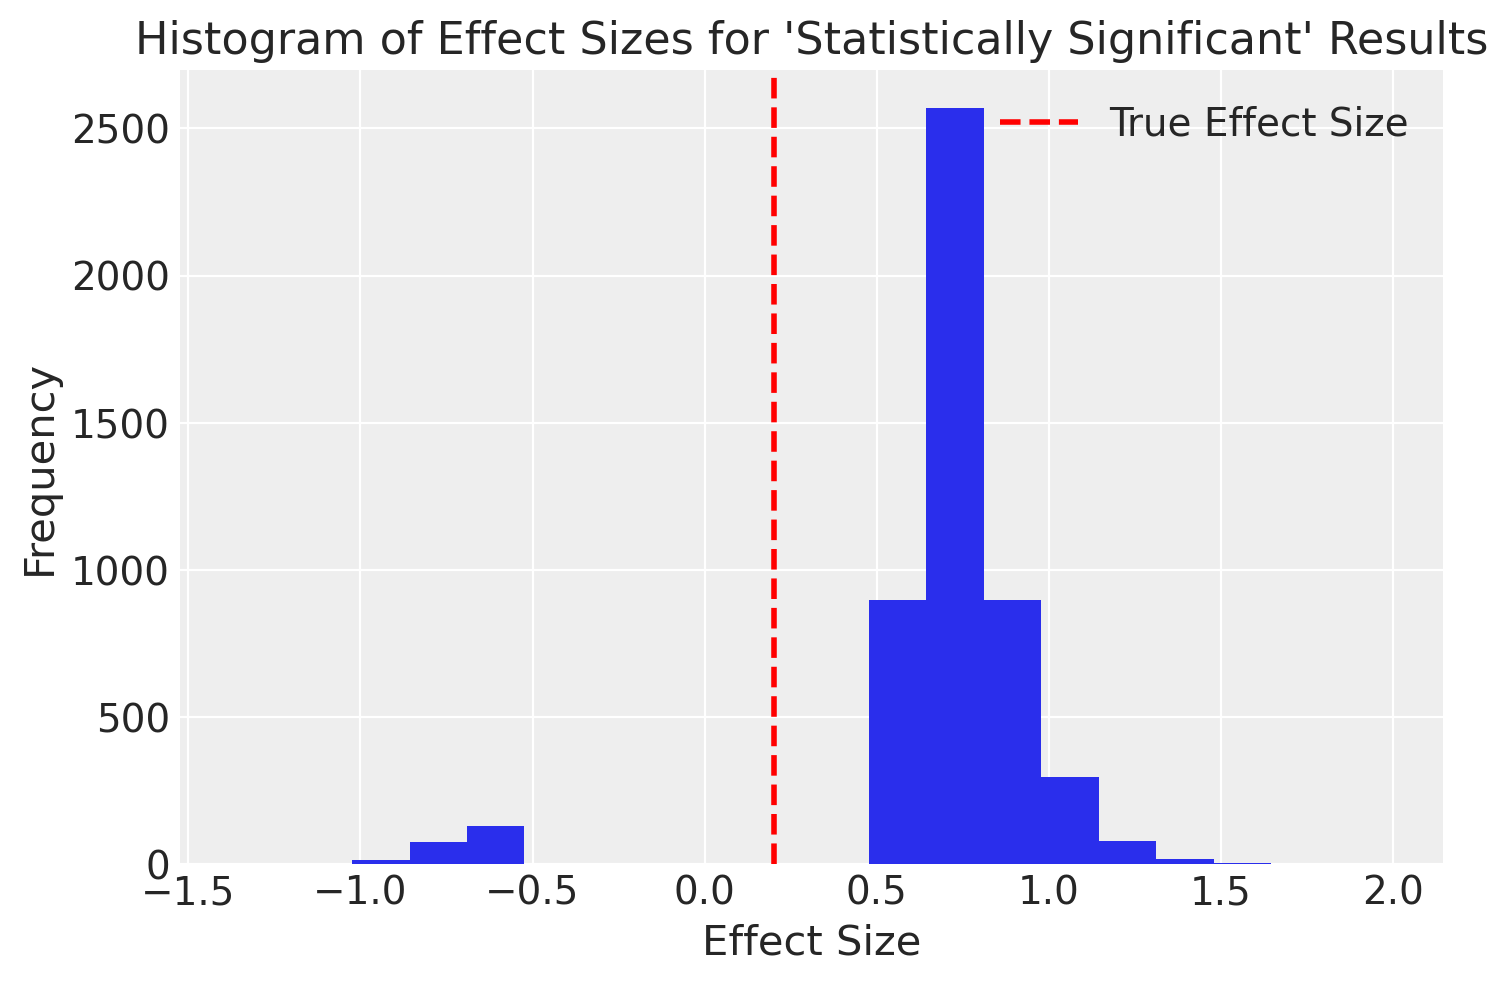

In [6]:
plt.hist(res, bins=20)
plt.axvline(
    x=0.2, color="red", linestyle="dashed", linewidth=2, label="True Effect Size"
)
plt.xlabel("Effect Size")
plt.ylabel("Frequency")
plt.title("Histogram of Effect Sizes for 'Statistically Significant' Results")
plt.legend()
_ = plt.show()

Come sottolineato da @loken2017measurement, l'utilizzo dell'approccio frequentista nella procedura di decisione statistica può portare a due tipi di errori significativi. Il primo errore, noto come "magnitude", si manifesta nel fatto che i risultati pubblicati tendono a sovrastimare la vera grandezza dell'effetto. Nella simulazione effettuata, sebbene la vera grandezza dell'effetto fosse modesta (0.2), la media della grandezza dell'effetto per i risultati dichiarati "statisticamente significativi" era di circa 0.8, indicando una grandezza dell'effetto "ampia".

Il secondo errore, denominato "segno", si verifica in alcune situazioni in cui, a causa della variabilità campionaria, viene commesso un errore nella direzione dell'effetto. In tali circostanze, il ricercatore potrebbe erroneamente concludere che $\mu_2 > \mu_1$, quando in realtà non è così. È importante notare che, anche in questi casi, la grandezza dell'effetto viene sovrastimata in termini assoluti.

È interessante notare che le stesse conclusioni si applicherebbero anche se avessimo considerato l'intervallo di confidenza per la differenza tra le medie. In sintesi, l'approccio frequentista introduce un errore sistematico nella stima della grandezza dell'effetto, che è la quantità più importante che il ricercatore deve stimare. In alcune situazioni, può persino causare errori nella stima della direzione dell'effetto.

## Considerazioni conclusive

In conclusione, l'approccio frequentista non fornisce un metodo affidabile per valutare i risultati della ricerca e determinare la loro attendibilità o la necessità di scartarli [gelman2014beyond; @loken2017measurement]. Questa mancanza di affidabilità deriva dall'introduzione di errori sistematici nella stima delle dimensioni dell'effetto, che può anche portare a errori nella direzione dell'effetto in alcune circostanze. Di conseguenza, non sembra esserci motivo valido per continuare a impiegare questo approccio.

Al contrario, l'adozione dell'approccio bayesiano sembra offrire risultati più precisi e affidabili nella valutazione dei dati di ricerca. Tale approccio considera la probabilità delle ipotesi alla luce dei dati osservati, evitando gli errori intrinseci dell'approccio frequentista e fornendo una base più solida per le decisioni sulla validità dei risultati.

## Esercizi

::: {#exr-s-m-errors-1}

Esegui una simulazione con 10.000 ripetizioni (nrep = 10000) in cui vengono estratti due campioni casuali dalla stessa popolazione normale con media 0 e deviazione standard 10. Per ogni simulazione, esegui un t-test per confrontare le medie di due gruppi indipendenti.

1. *Proporzione di risultati statisticamente significativi*: Calcola la proporzione di risultati in cui si ottiene un risultato statisticamente significativo (p < 0.05) in questa condizione in cui i campioni provengono dalla stessa popolazione, e quindi non c'è una differenza reale tra i gruppi. Questo ti darà un'idea della frequenza dei falsi positivi.

2. *Grandezza dell'effetto media*: Calcola la grandezza dell'effetto (d di Cohen) media, considerando solo quei test in cui si è ottenuta una differenza statisticamente significativa. Questo valore ti mostrerà quanto grande appare l'effetto quando il risultato è significativo, nonostante la realtà sia priva di un effetto reale.

3. *Ripetizione della simulazione con diverse grandezze campionarie*: Ripeti la simulazione usando due diverse dimensioni campionarie: 20 osservazioni per gruppo e 200 osservazioni per gruppo. Confronta i risultati per capire come la dimensione del campione influenzi la proporzione di falsi positivi e la grandezza dell'effetto media.

4. *Interpretazione dei risultati*: Interpreta i risultati alla luce del concetto del "filtro della significatività statistica". Questo concetto suggerisce che tra tutti gli studi effettuati, tendono ad essere pubblicati e riportati solo quelli che ottengono risultati statisticamente significativi. Di conseguenza, i risultati significativi pubblicati possono sovrastimare la vera grandezza dell'effetto o indicare erroneamente che un effetto esiste quando in realtà non c'è. Questa simulazione dovrebbe mostrare come, anche in assenza di una differenza reale tra gruppi, si possano ottenere risultati apparentemente significativi con una certa frequenza, soprattutto quando la dimensione campionaria è piccola.

:::

## Informazioni sull'Ambiente di Sviluppo

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun May 12 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

arviz     : 0.18.0
scipy     : 1.13.0
matplotlib: 3.8.4
seaborn   : 0.13.2
numpy     : 1.26.4

Watermark: 2.4.3

